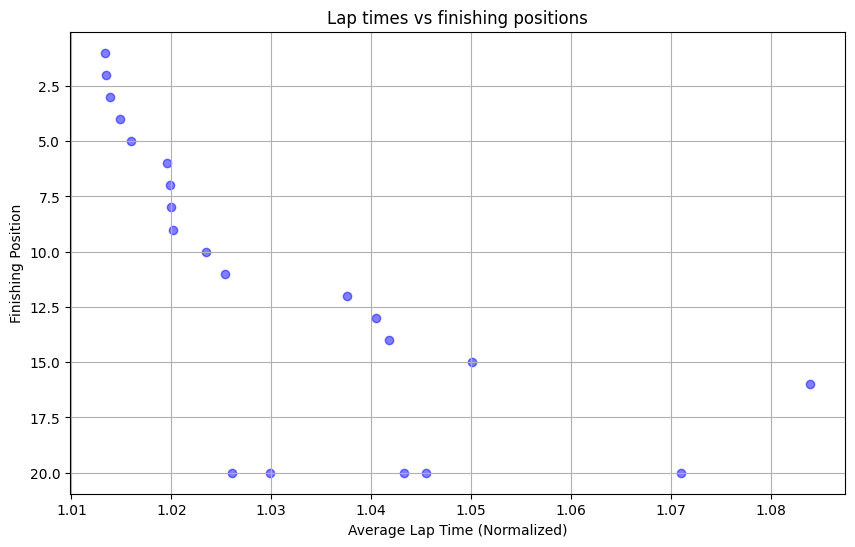

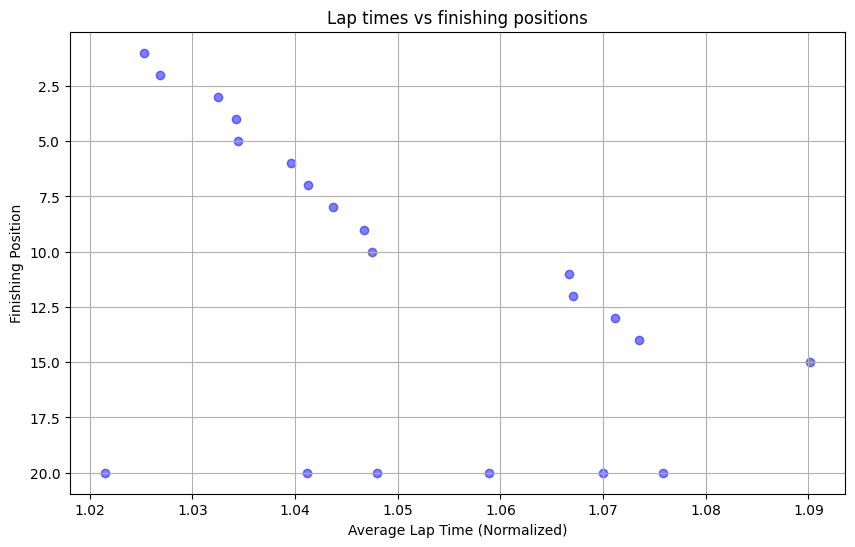

KeyboardInterrupt: 

In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt

# Load data
races = pd.read_csv("data/races.csv")
lap_times = pd.read_csv("data/lap_times.csv")
results = pd.read_csv("data/results.csv")

for race_id in races['raceId']:
    plot_data = {}
    race_id += 200
    
    laptimes_race = lap_times[lap_times['raceId'] == race_id]
    results_race = results[results['raceId'] == race_id]
    amount_of_laps = laptimes_race['lap'].unique().max()
    current_shortest = float('inf')
    
    for lap in laptimes_race['lap'].unique():
        driver_laptimes = laptimes_race[laptimes_race['lap'] == lap].sort_values('position')
        driver_laptimes = driver_laptimes.merge(results_race[['driverId', 'position']], on='driverId')
        
        # Update the current shortest lap time
        if driver_laptimes['milliseconds'].min() < current_shortest:
            current_shortest = driver_laptimes['milliseconds'].min()
        
        # Normalize lap times
        driver_laptimes['milliseconds'] /= current_shortest
        driver_laptimes['lap'] /= amount_of_laps
        
        # Collect data for each driver
        for driver_id in driver_laptimes['driverId'].unique():
            driver_data = driver_laptimes[driver_laptimes['driverId'] == driver_id]
            driver_id = int(driver_id)
            if driver_id not in plot_data:
                plot_data[driver_id] = []
            plot_data[driver_id].append(driver_data['milliseconds'].values[0])
    
    # Calculate average normalized lap time for each driver
    for driver_id in plot_data:
        plot_data[driver_id] = float(sum(plot_data[driver_id]) / len(plot_data[driver_id]))
    
    # Get finishing positions
    finishing_positions = results_race[['driverId', 'position']].set_index('driverId').to_dict()['position']
    for driver_id in plot_data:
        if driver_id in finishing_positions:
            position = finishing_positions[driver_id]
            if position == '\\N':
                position = 20 
            else:
                position = int(position)
            plot_data[driver_id] = (plot_data[driver_id], int(position))
        else:
            plot_data[driver_id] = (plot_data[driver_id], 20)
    
    plot_data = [value for value in plot_data.values()]
    plot_data = sorted(plot_data, key=lambda x: x[1])
    x_values = []
    y_values = []
    for nlt, fp in plot_data:
        x_values.append(nlt)
        y_values.append(fp)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.title("Lap times vs finishing positions")
    plt.xlabel("Average Lap Time (Normalized)")
    plt.ylabel("Finishing Position")
    plt.grid()
    plt.scatter(x_values, y_values, c='blue', alpha=0.5)
    plt.gca().invert_yaxis()
    plt.show()
    time.sleep(4)